# Lending Club Case Study

## Expolatory Data Analysis

### Problem Statement:

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Approach:
We are concerned about determining the driver variable for 'defaulters'. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

### Data Understanding:
We have been given data dictionary and loan data for all loans issued through the time period 2007 t0 2011.


### 1. Data Sourcing and importing required libraries for EDA:

In [48]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#Importing dataset
loan = pd.read_csv("loan.csv", index_col=0)


C:\Users\NishthaS\AppData\Local\Temp\ipykernel_9240\281989249.py:12: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv", index_col=0)


### 2. Data Inspection:

In [46]:
loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [47]:
loan.tail(5)  

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 110)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


In [7]:
loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### 3. Data Cleaning:

#### a) Dropping the duplicate rows

In [10]:
loan.shape

#loan[loan.duplicated()]
#loan_rm_dup = loan_valid.drop_duplicates()

(39717, 110)

In [11]:
duplicate_rows_loan = loan[loan.duplicated()]
print("number of duplicate rows: ", duplicate_rows_loan.shape)

number of duplicate rows:  (0, 110)


No duplicate rows

#### b) Dropping the missing or null values

In [15]:
print(loan.isnull().sum())

temp = pd.DataFrame(loan.isnull().sum())
temp.to_csv("missingvaluee.csv")

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64


In [18]:
loan_rm_missval = loan.drop(['mths_since_last_record', 'next_pymnt_d','mths_since_last_major_derog',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'mths_since_last_delinq'                           
], axis=1)

print(loan_rm_missval.shape)

loan_rm_missval.isnull().sum()

(39717, 53)


member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    

### 4. Exploratory Data Analysis

#### Bivariate Analysis (Categorical columns)

<Axes: xlabel='addr_state'>

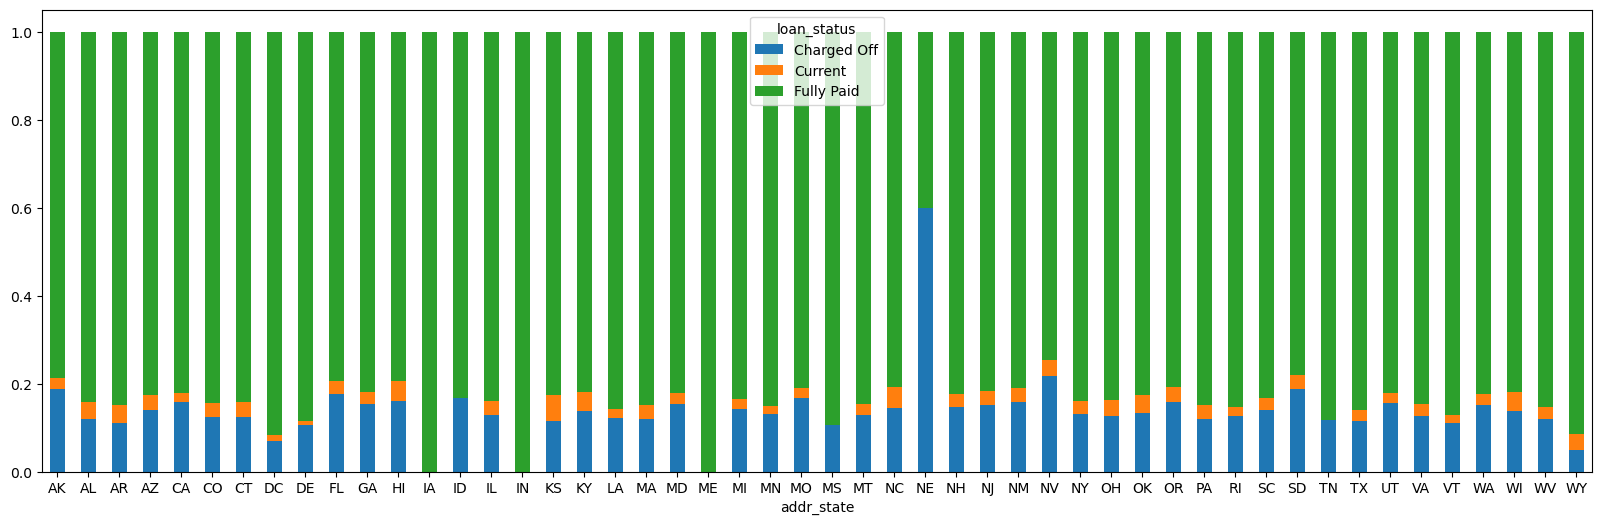

In [23]:
#select relevant categorical columns that can be deriving factors behind loan default.

loan_cat_fact = loan[['member_id','loan_status','addr_state','purpose','int_rate','sub_grade','home_ownership']]

#Calculating crosstab stacked chart based on percentage
CrosstabResult1 = pd.crosstab(loan_cat_fact.addr_state , loan_cat_fact.loan_status).apply(lambda r: r/r.sum(), axis=1)
#print(CrosstabResult1)

#platting crosstab stacked chart based on percentage for loan status charged off, current and fully paid for relevant categorical columns
CrosstabResult1.plot(kind='bar', figsize=(20,6),stacked=True, rot=0)

Above chart shows loans applicant having address state as NE re more predective to be defaulter

<Axes: xlabel='purpose'>

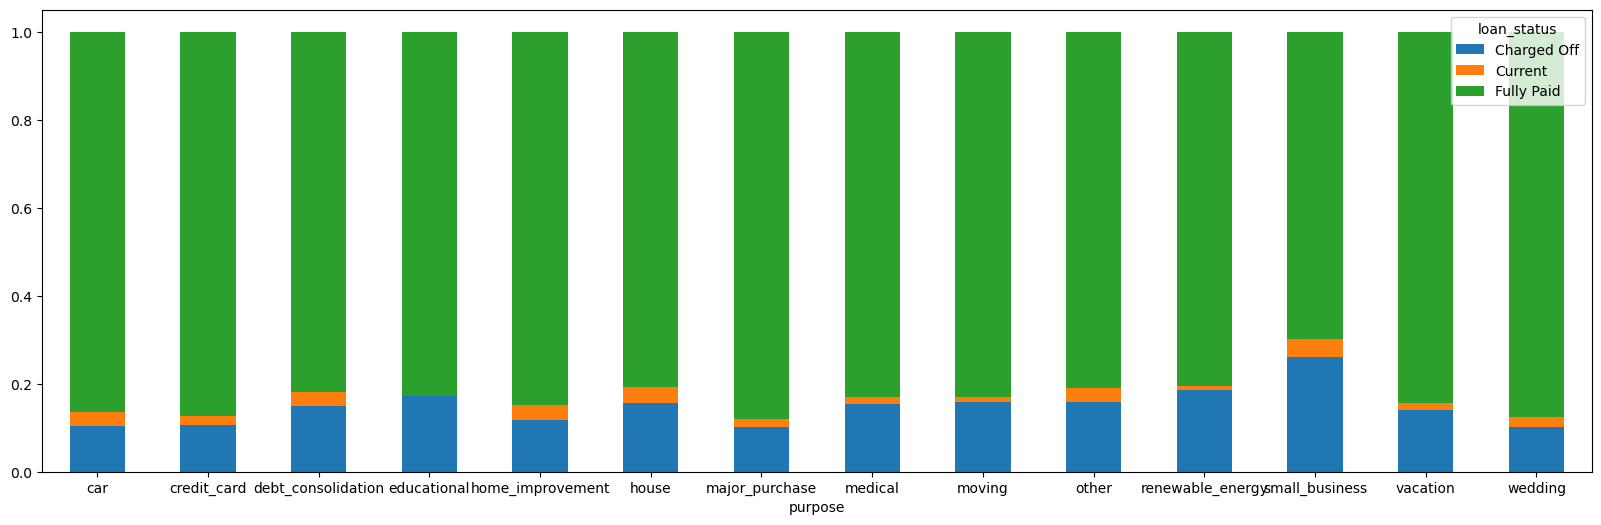

In [24]:
CrosstabResult1 = pd.crosstab(loan_cat_fact.purpose , loan_cat_fact.loan_status).apply(lambda r: r/r.sum(), axis=1)

#platting crosstab stacked chart based on percentage for loan status charged off, current and fully paid for relevant categorical columns
CrosstabResult1.plot(kind='bar', figsize=(20,6),stacked=True, rot=0)

Above chart shows loans applicant having small business are more predective to be defaulter

<Axes: xlabel='sub_grade'>

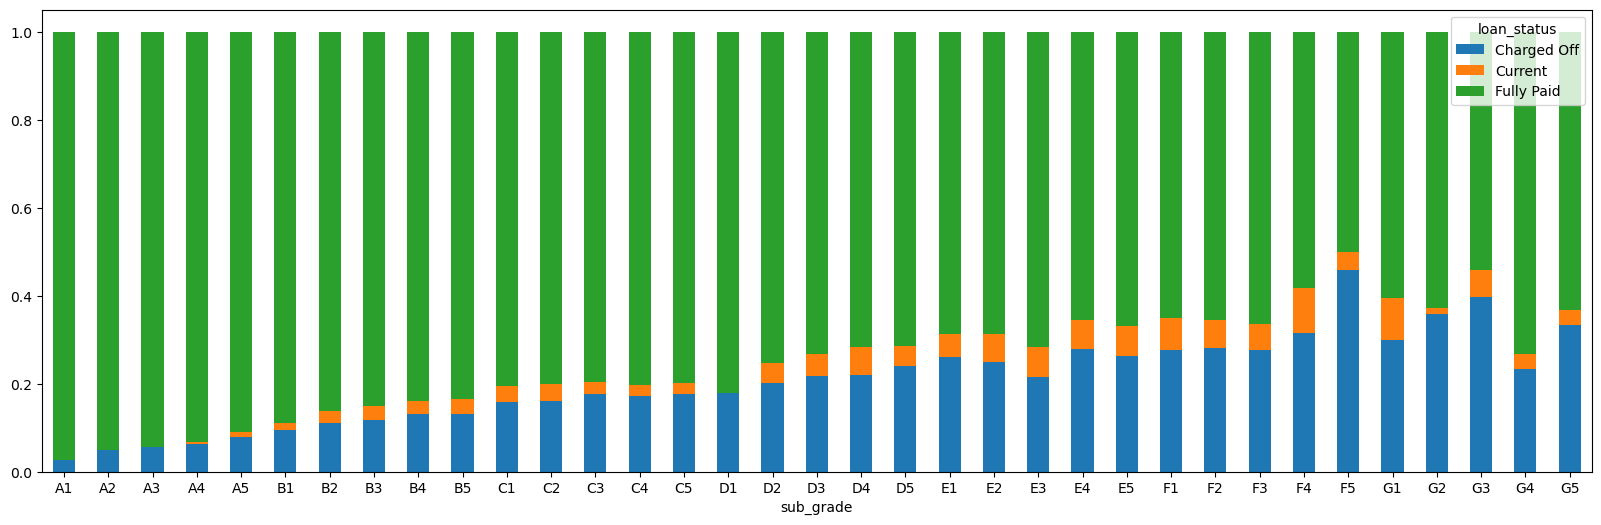

In [25]:
CrosstabResult1 = pd.crosstab(loan_cat_fact.sub_grade , loan_cat_fact.loan_status).apply(lambda r: r/r.sum(), axis=1)

#platting crosstab stacked chart based on percentage for loan status charged off, current and fully paid for relevant categorical columns
CrosstabResult1.plot(kind='bar', figsize=(20,6),stacked=True, rot=0)

Above chart shows loans applicant having sub grades from E1 to to G5 are more predective to be defaulter

<Axes: xlabel='int_rate'>

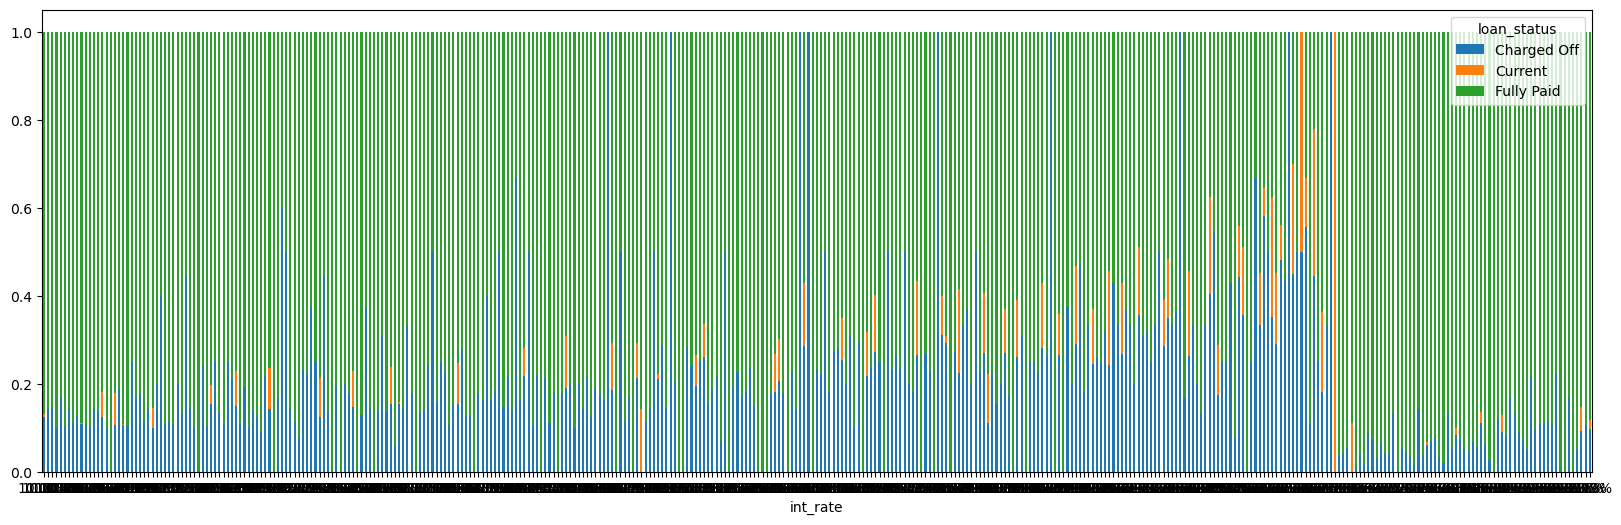

In [26]:
CrosstabResult1 = pd.crosstab(loan_cat_fact.int_rate , loan_cat_fact.loan_status).apply(lambda r: r/r.sum(), axis=1)
CrosstabResult1.to_csv('int_rate.csv')

#platting crosstab stacked chart based on percentage for loan status charged off, current and fully paid for relevant categorical columns
CrosstabResult1.plot(kind='bar', figsize=(20,6),stacked=True, rot=0)

Above chart and csv shows loans applicant having interest rate more than 19.16% are more predective to be defaulter though the relationship is not very strong but can be predected

<Axes: xlabel='home_ownership'>

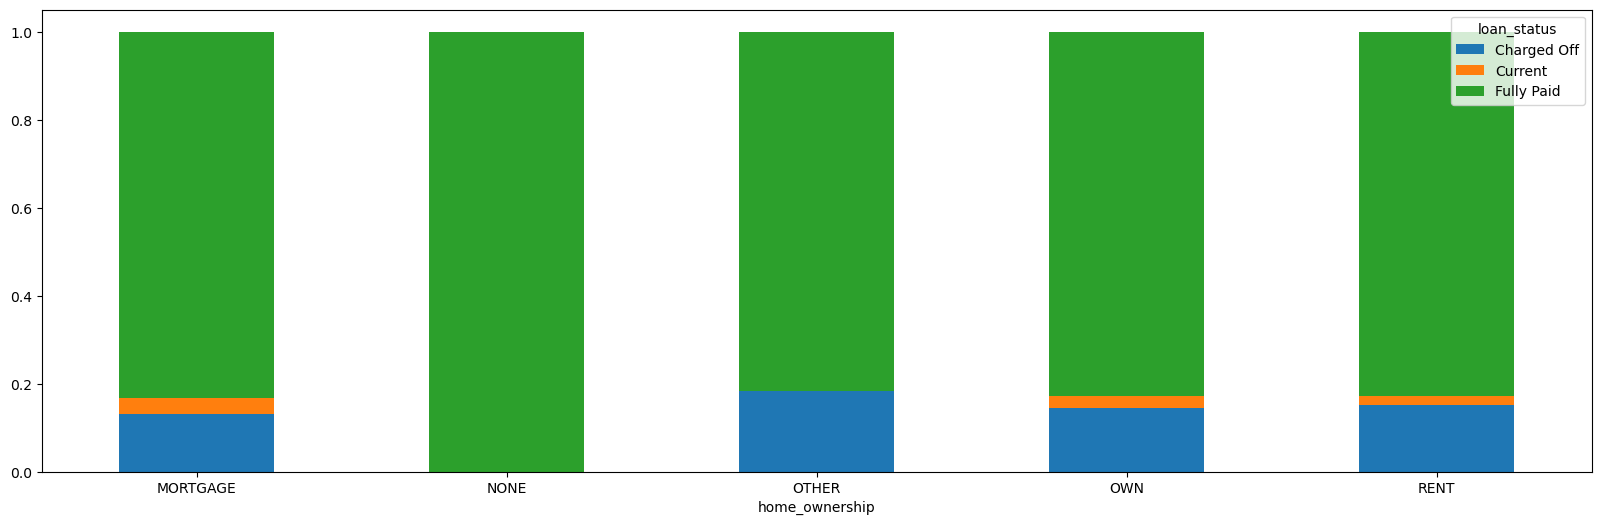

In [27]:
CrosstabResult1 = pd.crosstab(loan_cat_fact.home_ownership , loan_cat_fact.loan_status).apply(lambda r: r/r.sum(), axis=1)
CrosstabResult1.to_csv('int_rate.csv')

#platting crosstab stacked chart based on percentage for loan status charged off, current and fully paid for relevant categorical columns
CrosstabResult1.plot(kind='bar', figsize=(20,6),stacked=True, rot=0)

Above chart shows loans applicant has no relation between home ownership and being defaulter

##### Bivariate Analysis (Categorical column and Quantatitive column)

In [41]:
#select relevant categorical columns that can be deriving factors behind loan default.

loan_qnt_fact = loan[['member_id','loan_status','last_pymnt_amnt','pub_rec','recoveries','loan_amnt','funded_amnt']]

loan_qnt_fact.describe()

,member_id,last_pymnt_amnt,pub_rec,recoveries,loan_amnt,funded_amnt
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,8.504636e+05,2678.826162,0.055065,95.221624,11219.443815,10947.713196
std,2.656783e+05,4447.136012,0.237200,688.744771,7456.670694,7187.238670
min,7.069900e+04,0.000000,0.000000,0.000000,500.000000,500.000000
25%,6.667800e+05,218.680000,0.000000,0.000000,5500.000000,5400.000000
50%,8.508120e+05,546.140000,0.000000,0.000000,10000.000000,9600.000000
75%,1.047339e+06,3293.160000,0.000000,0.000000,15000.000000,15000.000000
max,1.314167e+06,36115.200000,4.000000,29623.350000,35000.000000,35000.000000


In [43]:
#checking stats for defaulters by filtering data for Charged Off
loan_qnt_fact_ch = loan_qnt_fact[loan_qnt_fact['loan_status'] =='Charged Off']
loan_qnt_fact_ch.describe()

,member_id,last_pymnt_amnt,pub_rec,recoveries,loan_amnt,funded_amnt
count,5.627000e+03,5627.000000,5627.000000,5627.000000,5627.000000,5627.000000
mean,8.677521e+05,326.020833,0.084770,672.101872,12104.385108,11753.398792
std,2.723270e+05,528.983051,0.284873,1720.742949,8085.732038,7760.516335
min,8.035300e+04,0.000000,0.000000,0.000000,900.000000,900.000000
25%,6.849050e+05,112.885000,0.000000,0.000000,5600.000000,5575.000000
50%,8.881580e+05,238.250000,0.000000,173.040000,10000.000000,10000.000000
75%,1.066578e+06,405.705000,0.000000,595.655000,16500.000000,16000.000000
max,1.314167e+06,12818.380000,2.000000,29623.350000,35000.000000,35000.000000


In [42]:
##checking stats for non defaulters by filtering data not equal to Charged Off
loan_qnt_fact_nonch = loan_qnt_fact[loan_qnt_fact['loan_status'] !='Charged Off']
loan_qnt_fact_nonch.describe()

,member_id,last_pymnt_amnt,pub_rec,recoveries,loan_amnt,funded_amnt
count,3.409000e+04,34090.000000,34090.000000,34090.0,34090.000000,34090.000000
mean,8.476099e+05,3067.187429,0.050161,0.0,11073.372690,10814.724259
std,2.644602e+05,4683.032575,0.228009,0.0,7337.530962,7079.465175
min,7.069900e+04,0.000000,0.000000,0.0,500.000000,500.000000
25%,6.631132e+05,255.310000,0.000000,0.0,5450.000000,5356.250000
50%,8.462780e+05,775.380000,0.000000,0.0,9800.000000,9600.000000
75%,1.043909e+06,4069.705000,0.000000,0.0,15000.000000,15000.000000
max,1.313524e+06,36115.200000,4.000000,0.0,35000.000000,35000.000000


On comparison of above stats it looks like mean for quantatitive columns last_pymnt_amnt, pub_rec and recoveries
aginst loan status has major difference as compared to loan amount and funded amount

<Axes: xlabel='loan_status', ylabel='last_pymnt_amnt'>

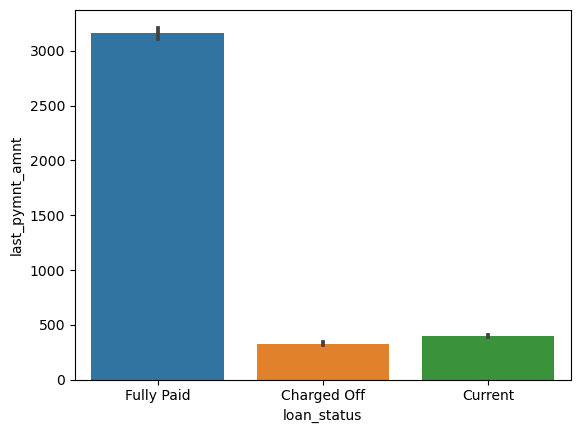

In [35]:
#plotting bar chart using seaborn against each quantative column to confirm realtionship 
sns.barplot(data = loan_qnt_fact,x='loan_status', y='last_pymnt_amnt')

From above bar char for loan applicants whose last total payment amount received is less than 300 are more predective to be defaulters

<Axes: xlabel='loan_status', ylabel='recoveries'>

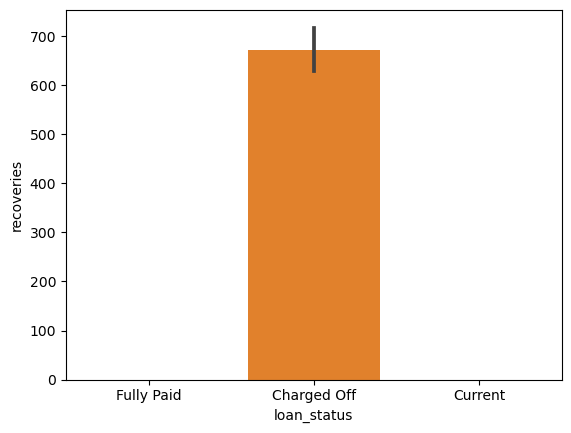

In [36]:
#plotting bar chart using seaborn against each quantative column to confirm realtionship 
sns.barplot(data = loan_qnt_fact,x='loan_status', y='recoveries')

From above bar char for loan applicants whose post charge off gross recovery are more predective to be defaulters

<Axes: xlabel='loan_status', ylabel='pub_rec'>

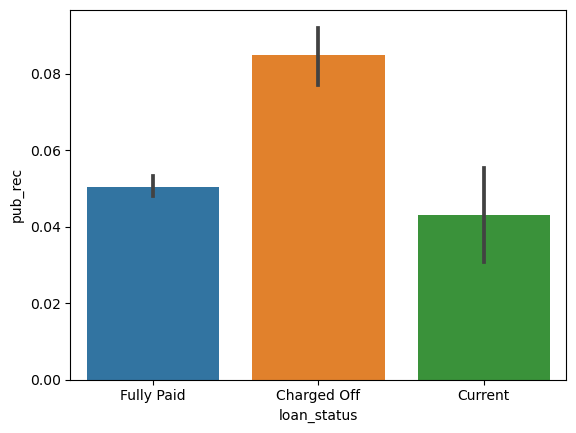

In [38]:
#plotting bar chart using seaborn against each quantative column to confirm realtionship 
sns.barplot(data = loan_qnt_fact,x='loan_status', y='pub_rec')

From above bar char for loan applicants who has more number of derogatory public record are more predective to be defaulters

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

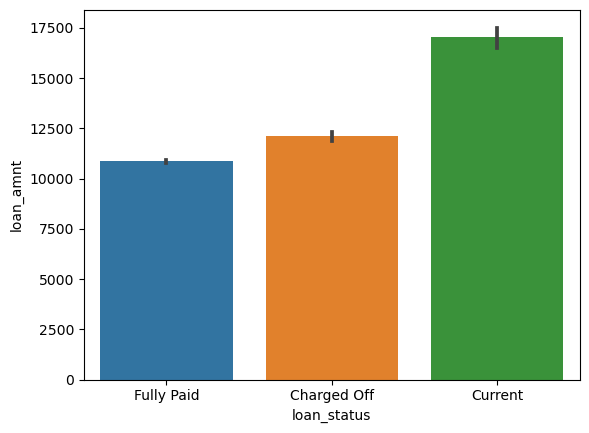

In [39]:
#plotting bar chart using seaborn against each quantative column to confirm realtionship 
sns.barplot(data = loan_qnt_fact,x='loan_status', y='loan_amnt')

From above bar chart loan applicants being defaulters and loan amount has no relationship. Let's confirm this more with scatter chart

<Axes: xlabel='member_id', ylabel='loan_amnt'>

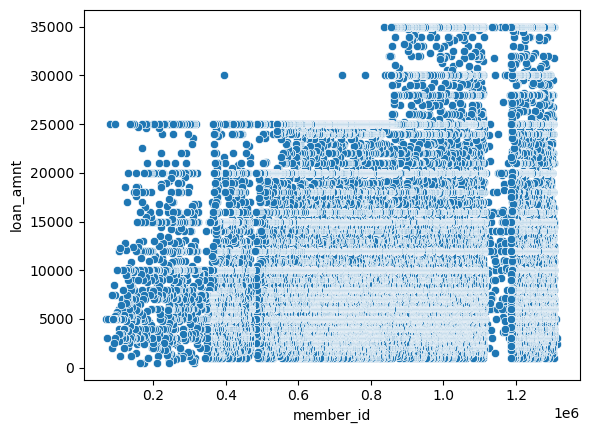

In [44]:
#scatter chart for non charged off applicants
sns.scatterplot(data = loan_qnt_fact_nonch, x = 'member_id', y = 'loan_amnt')

<Axes: xlabel='member_id', ylabel='loan_amnt'>

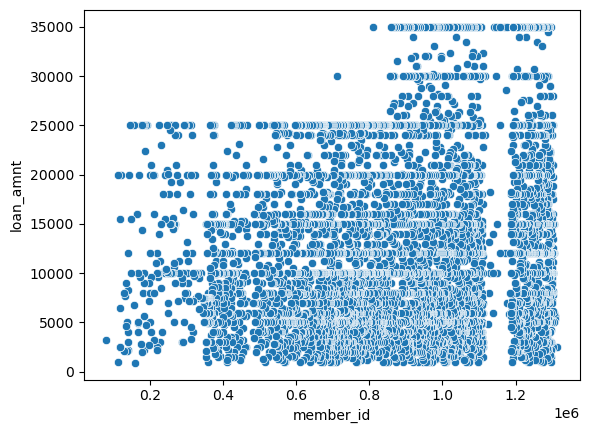

In [45]:
#scatter chart for charged off applicants
sns.scatterplot(data = loan_qnt_fact_ch, x = 'member_id', y = 'loan_amnt')

Both the scatter shows distribution is same and there are no outliers 